In [1]:
# exercise 10_1_5
import importlib_resources
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import loadmat
from sklearn.cluster import k_means
import pandas as pd



In [2]:
data = pd.read_csv('data.csv')
prices = data[['date','price_GER']]

In [3]:
# create a df with one column for each hour and one row for each day
prices_copy = prices.copy()
prices_copy['hour'] = prices_copy['date'].str.extract('(\d+):').astype(int)
prices_copy['day'] = prices_copy['date'].str.extract('(\d+-\d+-\d+)')
prices_tab = prices_copy.pivot(index='day', columns='hour', values='price_GER')
prices_tab



hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
2019-01-01,28.3200,10.0700,-4.0800,-9.9100,-7.4100,-12.5500,-17.2500,-15.0700,-4.9300,-6.3300,...,0.0000,-0.0300,1.9700,9.0600,0.0700,-4.9700,-6.9800,-24.9300,-4.8700,-28.9300
2019-01-02,-33.5700,-45.9200,-48.2900,-44.9900,-48.9300,-29.9100,-0.0100,37.4300,48.0600,50.7400,...,49.6400,53.6700,56.0100,56.9500,62.0800,62.1100,57.9900,55.6400,55.1300,50.7600
2019-01-03,42.9100,45.2200,45.6300,44.0000,43.8800,45.9200,51.0700,52.7700,62.8900,60.0300,...,65.2400,67.7600,68.4100,69.5500,67.2800,69.4600,68.3800,61.7200,53.7200,49.9800
2019-01-04,50.7300,47.1100,47.0700,46.9400,47.0000,46.9100,49.5900,55.3200,55.7800,55.5200,...,51.4100,51.6900,52.5900,54.6600,54.1000,51.8900,46.5800,45.4300,43.9600,31.4100
2019-01-05,26.9000,25.1200,24.1200,22.0400,18.3700,22.0900,23.3500,28.7600,36.6300,40.4600,...,51.9200,53.2200,56.6200,56.9200,61.6400,59.4400,52.7500,51.9000,51.3800,49.9600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,33.0725,33.0675,31.7550,31.5875,30.4300,43.7900,59.9100,89.0025,88.7175,88.9775,...,62.7150,62.7925,75.0175,87.6775,86.2675,70.7775,61.2700,56.3100,50.4100,37.0400
2023-12-28,1.8875,0.3825,0.2825,-0.9175,-0.7425,0.6700,4.3225,25.7675,33.8075,36.7600,...,32.0800,41.7325,45.7100,64.0825,59.4825,52.2175,29.9075,20.5400,16.8000,3.2225
2023-12-29,-5.0475,-7.5475,-7.2400,-8.3450,-8.4475,-7.2175,-6.5350,1.4950,9.1875,10.0025,...,1.5450,9.8575,17.3125,33.2650,34.4875,26.9725,18.2500,12.3675,11.0025,5.8400


In [4]:
# drop the rows with missing values
prices_tab = prices_tab.dropna()
prices_tab

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
2019-01-01,28.3200,10.0700,-4.0800,-9.9100,-7.4100,-12.5500,-17.2500,-15.0700,-4.9300,-6.3300,...,0.0000,-0.0300,1.9700,9.0600,0.0700,-4.9700,-6.9800,-24.9300,-4.8700,-28.9300
2019-01-02,-33.5700,-45.9200,-48.2900,-44.9900,-48.9300,-29.9100,-0.0100,37.4300,48.0600,50.7400,...,49.6400,53.6700,56.0100,56.9500,62.0800,62.1100,57.9900,55.6400,55.1300,50.7600
2019-01-03,42.9100,45.2200,45.6300,44.0000,43.8800,45.9200,51.0700,52.7700,62.8900,60.0300,...,65.2400,67.7600,68.4100,69.5500,67.2800,69.4600,68.3800,61.7200,53.7200,49.9800
2019-01-04,50.7300,47.1100,47.0700,46.9400,47.0000,46.9100,49.5900,55.3200,55.7800,55.5200,...,51.4100,51.6900,52.5900,54.6600,54.1000,51.8900,46.5800,45.4300,43.9600,31.4100
2019-01-05,26.9000,25.1200,24.1200,22.0400,18.3700,22.0900,23.3500,28.7600,36.6300,40.4600,...,51.9200,53.2200,56.6200,56.9200,61.6400,59.4400,52.7500,51.9000,51.3800,49.9600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,5.2150,0.2050,-4.6000,-4.5000,-3.0150,-4.5300,-2.6725,6.9400,3.7850,3.3200,...,0.6875,8.1875,44.4850,51.5450,51.8625,51.7900,51.9425,51.7425,51.7025,49.2800
2023-12-27,33.0725,33.0675,31.7550,31.5875,30.4300,43.7900,59.9100,89.0025,88.7175,88.9775,...,62.7150,62.7925,75.0175,87.6775,86.2675,70.7775,61.2700,56.3100,50.4100,37.0400
2023-12-28,1.8875,0.3825,0.2825,-0.9175,-0.7425,0.6700,4.3225,25.7675,33.8075,36.7600,...,32.0800,41.7325,45.7100,64.0825,59.4825,52.2175,29.9075,20.5400,16.8000,3.2225


In [5]:
# Make sure that each rows has a mean of 0 and a standard deviation of 1
#prices_tab = prices_tab.apply(lambda x: (x - x.mean()) / x.std(), axis=1)
#prices_tab

<Figure size 640x480 with 0 Axes>

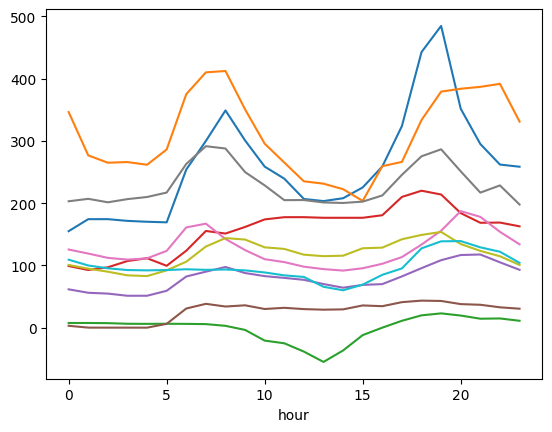

In [6]:
# plot the data for 10 random rows
plt.figure()
prices_tab.sample(10).T.plot(legend=False)
plt.show()



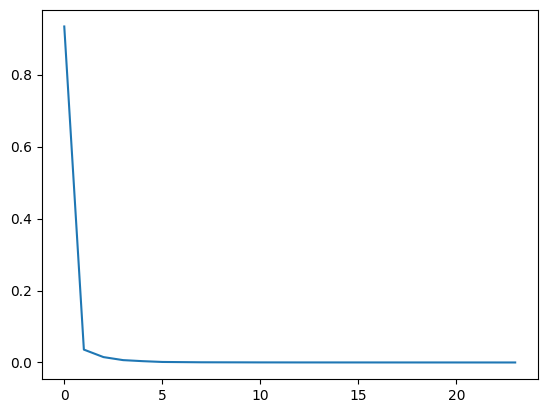

[0.93363537 0.03581408 0.01497031]


In [7]:
# do a PCA on the data
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(prices_tab)
plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.show()

# Print the explained variance of the first 3 components
print(pca.explained_variance_ratio_[:3])


<Figure size 640x480 with 0 Axes>

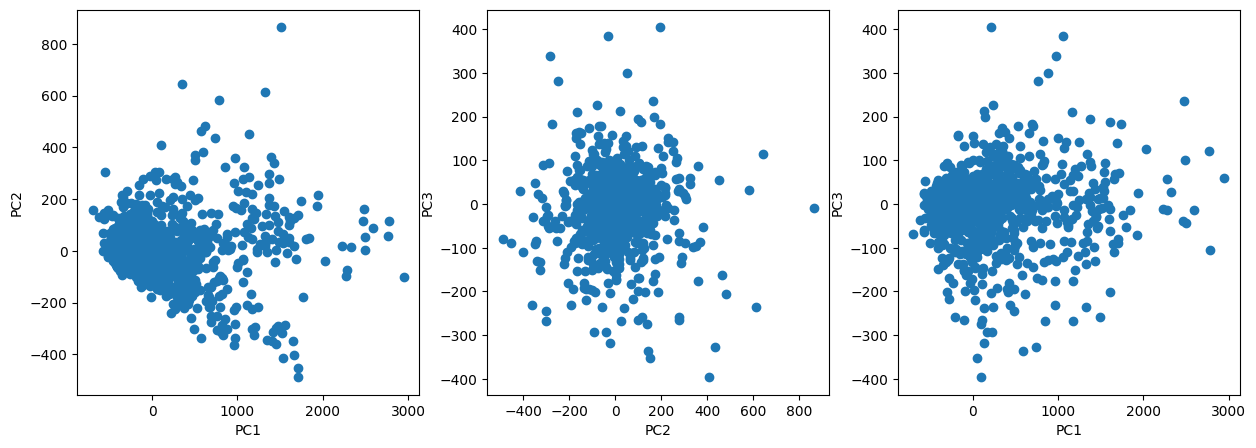

In [8]:
# do subplots with PC1 vs PC2, PC2 vs PC3 and PC1 vs PC3, and change the widht of the plot
pca = PCA(n_components=3)
X = pca.fit_transform(prices_tab)
plt.figure()
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.scatter(X[:,0], X[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.subplot(132)
plt.scatter(X[:,1], X[:,2])
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.subplot(133)
plt.scatter(X[:,0], X[:,2])
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.show()


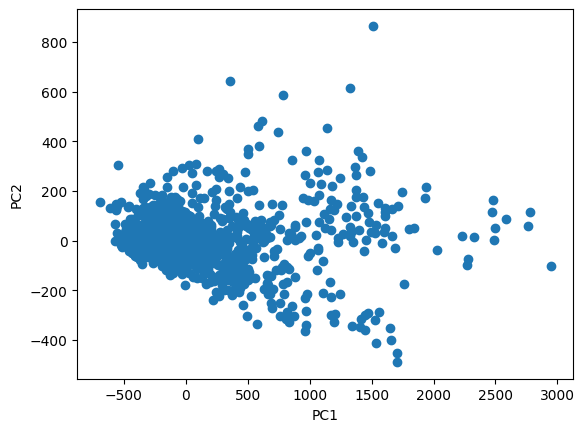

In [9]:
# Do only a PCA on the data with 2 PCs
pca = PCA(n_components=2)
X = pca.fit_transform(prices_tab)
plt.figure()
plt.scatter(X[:,0], X[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


Initialization complete
Iteration 0, inertia 33125886.37772519.
Iteration 1, inertia 27614930.012244202.
Iteration 2, inertia 27088602.59027613.
Iteration 3, inertia 26829581.216540456.
Iteration 4, inertia 26680157.026127018.
Iteration 5, inertia 26622189.54016009.
Iteration 6, inertia 26609622.201473728.
Iteration 7, inertia 26566230.589482203.
Iteration 8, inertia 26528168.555945568.
Iteration 9, inertia 26504268.813302137.
Iteration 10, inertia 26477659.820617035.
Iteration 11, inertia 26471088.941682614.
Converged at iteration 11: center shift 10.096982262326506 within tolerance 12.745799369329653.
Initialization complete
Iteration 0, inertia 33608812.74424598.
Iteration 1, inertia 28972084.752394237.
Iteration 2, inertia 27897196.594844468.
Iteration 3, inertia 27512340.416996613.
Iteration 4, inertia 27331575.53502036.
Iteration 5, inertia 27264948.884240203.
Iteration 6, inertia 27242874.615764666.
Iteration 7, inertia 27212007.98893168.
Iteration 8, inertia 27175852.954232685.

<Figure size 640x480 with 0 Axes>

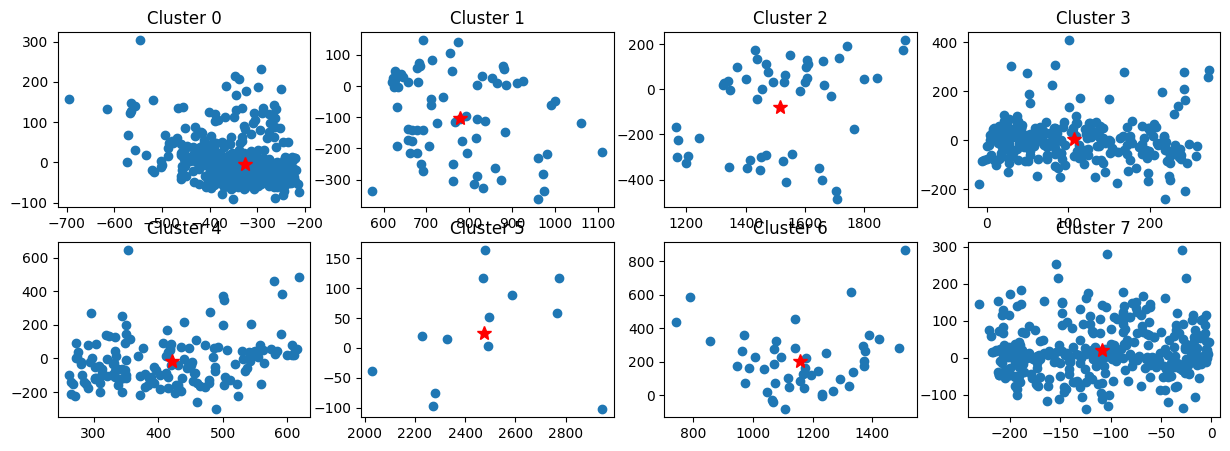

In [10]:
# Most of the explained variance is in the first and second component, so we can do a clustering only using PC1 and PC2
# Let's do a k-means clustering with a given number of cluster
from sklearn.cluster import KMeans

# Number of clusters:
K = 8

# Number of repetitions with different initial centroid seeds
S = 5

# Run k-means clustering:
centroids, cls, inertia = k_means(X, K, verbose=True, max_iter=100, n_init=S)

# Plot results:

# Plot centroids
plt.figure(1)
plt.figure(figsize=(15,5))
n1 = int(np.ceil(np.sqrt(K/2)))
n2 = int(np.ceil(float(K)/n1))
for k in range(K):
    plt.subplot(n1,n2,k+1)
    plt.plot(centroids[k,0], centroids[k,1], 'r*', markersize=10)
    plt.scatter(X[cls==k,0], X[cls==k,1])
    plt.title('Cluster %d' % k)
plt.show()



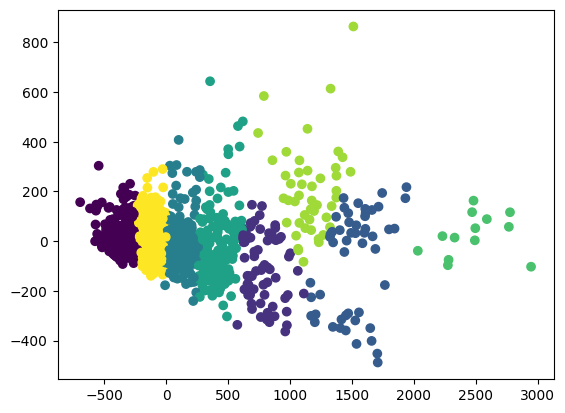

In [11]:
# Let's plot the data with the cluster color
plt.figure()
plt.scatter(X[:,0], X[:,1], c=cls)
plt.show()


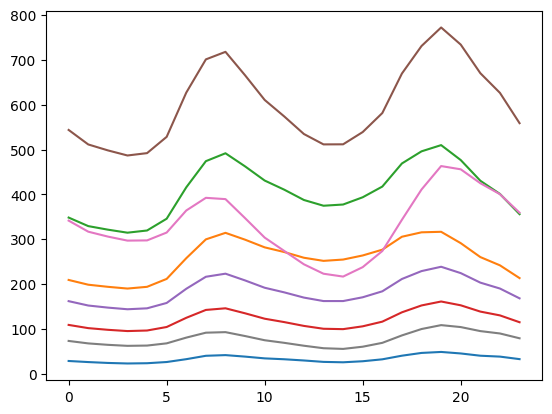

In [12]:
# Let's plot the centroids in the original space of the data
centroids = pca.inverse_transform(centroids)
plt.figure()
plt.plot(centroids.T)
plt.show()



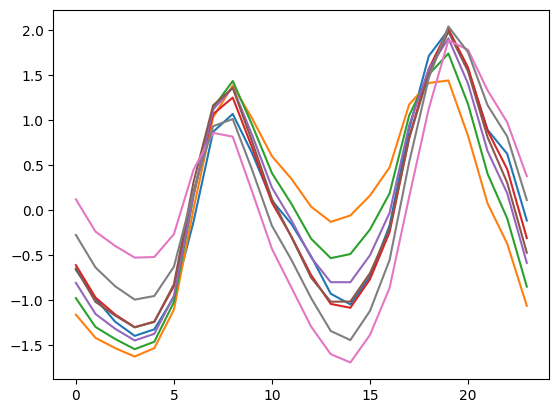

In [16]:
# standardize the data and plot the centroids
centroids = (centroids - centroids.mean(axis=1)[:,np.newaxis]) / centroids.std(axis=1)[:,np.newaxis]
plt.figure()
plt.plot(centroids.T)
plt.show()


In [13]:
# create a CSV file with the centroids in the original space, with hours as rows and clusters as columns
df = pd.DataFrame(centroids.T, columns=['Cluster %d' % k for k in range(K)])
df.to_csv('plans.csv', index=False)